# Milestone 3 - Regression Simulation 

## Author - Tariq Ayub



## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [137]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [138]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
dairy_data = pd.read_csv(fileName)

In [140]:
dairy_data

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
0,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
2,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
3,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
4,1995,May,4.470,73.730,2.227,0.8967,5,25,125
5,1995,Jun,4.238,77.994,2.124,0.9160,6,36,216
6,1995,Jul,4.377,81.475,2.184,0.9160,7,49,343
7,1995,Aug,4.368,74.981,2.152,0.8934,8,64,512
8,1995,Sep,3.917,61.530,2.062,0.8934,9,81,729
9,1995,Oct,4.078,60.022,2.121,0.9434,10,100,1000


In [141]:
cheese = dairy_data.pop('Cotagecheese.Prod')

In [142]:
cheese = np.log(cheese)

In [143]:
#adding a date index
cheese.index = pd.date_range(start = '1995-01', end = '2014-01', freq = 'M')
cheese.head(20)

1995-01-31    1.474763
1995-02-28    1.306981
1995-03-31    1.512486
1995-04-30    1.453953
1995-05-31    1.497388
1995-06-30    1.444091
1995-07-31    1.476364
1995-08-31    1.474305
1995-09-30    1.365326
1995-10-31    1.405607
1995-11-30    1.283985
1995-12-31    1.278431
1996-01-31    1.307792
1996-02-29    1.232269
1996-03-31    1.312917
1996-04-30    1.305084
1996-05-31    1.360207
1996-06-30    1.323355
1996-07-31    1.410743
1996-08-31    1.381031
Freq: M, Name: Cotagecheese.Prod, dtype: float64

Text(0.5, 0, 'Date')

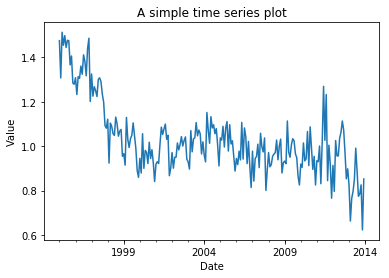

In [144]:
#plotting cheese production 
%matplotlib inline
import matplotlib.pyplot as plt
cheese.plot()
plt.title('A simple time series plot')
plt.ylabel('Value')
plt.xlabel('Date')

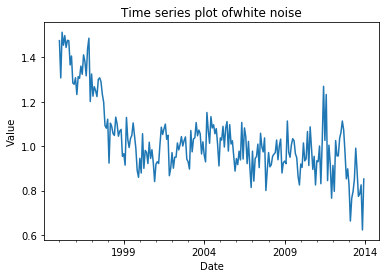

In [145]:
def plot_ts(ts, lab = ''):
    cheese.plot()
    plt.title('Time series plot of' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')

import numpy.random as nr
white = pd.Series(cheese)
plot_ts(white, 'white noise')

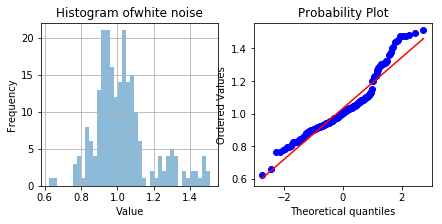

In [146]:
#plotting white noise series
def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    cheese.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(cheese, plot = ax2)
    
dist_ts(white, 'white noise') 

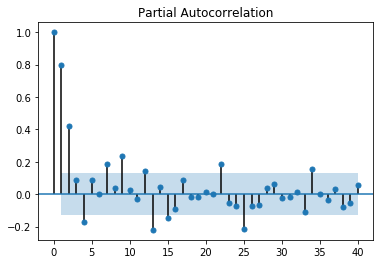

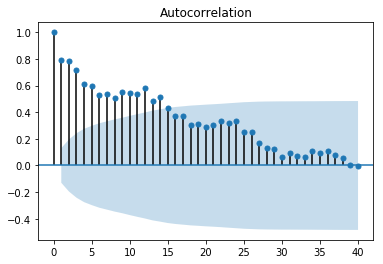

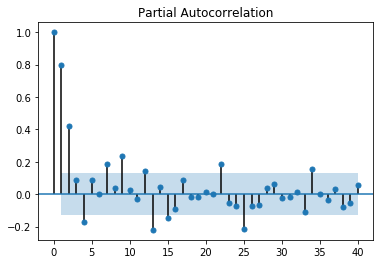

In [148]:
#within 95% confidnece interval only first 3 values have a significant PAC then it falls and stays 
# below 15%
#since over time both PAC and ACF fall, it stationary

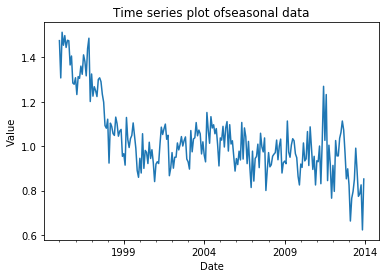

In [149]:
from math import sin

from math import pi
def seasonal_ts(start = '1-1995', end = '1-2014', freq = 'M', slope = 0.02, sd = 1.0, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    seasonal = pd.Series([slope*cheese for cheese in range(len(dates))],
                    index = dates)
    seasonal = seasonal + nr.normal(loc = mean, scale = sd, size = len(dates))
    seasonal = seasonal + [2.0*sin(pi*cheese/6) for cheese in range(len(dates))] + 5.0
    return(seasonal)

seasonal = seasonal_ts()
plot_ts(seasonal, 'seasonal data')

In [150]:
# as we a see a wave in ACF which continues downwards we can say that there is  
#of seasonal component 

               resid     trend  seasonal
1995-01-31       NaN       NaN -0.105467
1995-02-28       NaN       NaN  0.821082
1995-03-31       NaN       NaN  1.571630
1995-04-30       NaN       NaN  2.498979
1995-05-31       NaN       NaN  1.565332
1995-06-30       NaN       NaN  0.999147
1995-07-31 -0.669973  5.256846  0.183025
1995-08-31  1.592252  5.117641 -0.696776
1995-09-30 -0.586458  5.037029 -1.607794
1995-10-31 -0.058013  5.083386 -2.472232
1995-11-30  0.183201  5.001596 -1.825241
1995-12-31  1.795000  4.894377 -0.931684


,resid,trend,seasonal
2013-01-31,1.150690,8.973892,-0.105467
2013-02-28,-1.049839,9.021204,0.821082
2013-03-31,-1.595277,9.115280,1.571630
2013-04-30,0.443143,9.263977,2.498979
2013-05-31,-0.991413,9.314019,1.565332
2013-06-30,-0.815551,9.332308,0.999147
2013-07-31,NaN,NaN,0.183025
2013-08-31,NaN,NaN,-0.696776
2013-09-30,NaN,NaN,-1.607794
2013-10-31,NaN,NaN,-2.472232


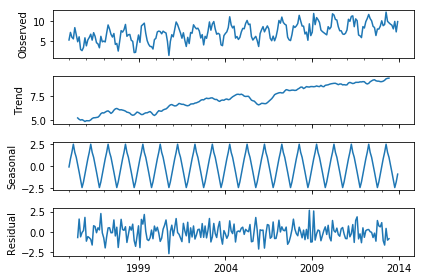

In [151]:
#applying stats model for seasonal 
import statsmodels.tsa.seasonal as sts
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(seasonal)
print(decomp[:12])
decomp[-12:]
#res_mean = res_df.resid.mean()
#if abs(res_mean) > 0.1: res_df.resid = [x - res_mean for x in res_df.resid]

               resid     trend  seasonal
1995-01-31       NaN       NaN -0.031217
1995-02-28       NaN       NaN -0.092606
1995-03-31       NaN       NaN  0.025221
1995-04-30       NaN       NaN -0.021971
1995-05-31       NaN       NaN  0.021397
1995-06-30       NaN       NaN  0.053774
1995-07-31  0.014796  1.407516  0.054051
1995-08-31 -0.004390  1.397446  0.081249
1995-09-30 -0.033280  1.386018  0.012588
1995-10-31 -0.000345  1.371499  0.034452
1995-11-30 -0.032206  1.359581 -0.043389
1995-12-31  0.023147  1.348834 -0.093550
               resid     trend  seasonal
2013-01-31 -0.041709  0.897978 -0.031217
2013-02-28 -0.120833  0.876642 -0.092606
2013-03-31 -0.110288  0.850534  0.025221
2013-04-30 -0.014370  0.832496 -0.021971
2013-05-31  0.012315  0.816867  0.021397
2013-06-30  0.131875  0.805378  0.053774
2013-07-31       NaN       NaN  0.054051
2013-08-31       NaN       NaN  0.081249
2013-09-30       NaN       NaN  0.012588
2013-10-31       NaN       NaN  0.034452
2013-11-30      

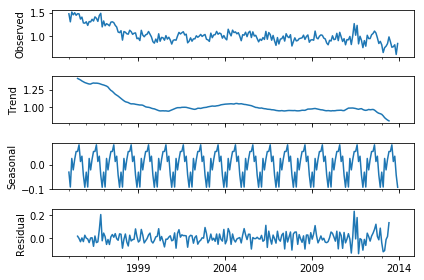

In [152]:
cheese_decomp = decomp_ts(cheese)
print(cheese_decomp.head(12))
print(cheese_decomp.tail(12))

In [153]:
#finding best fit BIC
def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

BIC, order, model = step_ARIMA(decomp.resid[6:-6], 3, 3, 3)    
print('***************************************')
print('Best model with BIC = ' + str(BIC) + ' and with order '+ str(order))

Testing model of order: (0, 0, 1) with BIC = 585.6452600637743
Testing model of order: (0, 0, 2) with BIC = 536.7929510834701
Testing model of order: (0, 0, 3) with BIC = 537.2551906546915
Testing model of order: (0, 1, 1) with BIC = 592.9651553804435
Testing model of order: (0, 2, 1) with BIC = 758.5305235295273
Testing model of order: (1, 0, 0) with BIC = 587.3181786158734
Testing model of order: (1, 0, 1) with BIC = 538.9138835394729
Testing model of order: (1, 0, 2) with BIC = 537.1565302411717
Testing model of order: (1, 0, 3) with BIC = 542.3358507405835
Testing model of order: (1, 1, 0) with BIC = 707.1294731445755
Testing model of order: (1, 2, 0) with BIC = 879.2735888099912
Testing model of order: (2, 0, 0) with BIC = 582.1209558288398
Testing model of order: (2, 0, 1) with BIC = 535.7580507537198
Testing model of order: (2, 1, 0) with BIC = 675.0965298282904
Testing model of order: (2, 2, 0) with BIC = 814.9843802612024
Testing model of order: (3, 0, 0) with BIC = 584.995671

In [154]:
# model of order: (3, 0, 1) with BIC = 520.4161061147768 is the best fit


In [155]:
#forecasting 

In [156]:
#addding date index
dairy_data.index = pd.date_range(start = '1995-01', end = '2014-01', freq = 'M')

In [157]:
#remaining columns to remove special characters
dairy_data.rename(columns={'Icecream.Prod': 'icecream', 'Milk.Prod': 'milk'}, inplace=True)


In [158]:
dairy_data

,Year,Month,icecream,milk,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995-01-31,1995,Jan,51.595,2.112,0.9803,1,1,1
1995-02-28,1995,Feb,56.086,1.932,0.8924,2,4,8
1995-03-31,1995,Mar,68.453,2.162,0.8924,3,9,27
1995-04-30,1995,Apr,65.722,2.130,0.8967,4,16,64
1995-05-31,1995,May,73.730,2.227,0.8967,5,25,125
1995-06-30,1995,Jun,77.994,2.124,0.9160,6,36,216
1995-07-31,1995,Jul,81.475,2.184,0.9160,7,49,343
1995-08-31,1995,Aug,74.981,2.152,0.8934,8,64,512
1995-09-30,1995,Sep,61.530,2.062,0.8934,9,81,729
1995-10-31,1995,Oct,60.022,2.121,0.9434,10,100,1000


In [159]:
## Create new features, the count of months from the start of the
## series and the square of the count of months.
dairy_data.loc[:, 'Month_Cnt'] = [float(i + 1) for i in range(len(dairy_data.milk))]
dairy_data.loc[:, 'Month_Cnt2'] = [x**2 for x in dairy_data.Month_Cnt]

## Normalize the time features
from scipy.stats import zscore
dairy_data.loc[:, ['Month_Cnt', 'Month_Cnt2']] = dairy_data.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)

## Create dummy variables for the months
years = int(len(dairy_data.milk)/12)
dairy_data.loc[:, 'Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * years
dummies = pd.get_dummies(dairy_data.loc[:, 'Month'])
dairy_data[list(dummies.columns)] = dummies
## Print the head of the data frame to look at the dummy variables.
dairy_data.head(12)

,Year,Month,icecream,milk,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,Month_Cnt,Month_Cnt2,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1995-01-31,1995,Jan,51.595,2.112,0.9803,1,1,1,-1.724471,-1.120740,...,0,0,1,0,0,0,0,0,0,0
1995-02-28,1995,Feb,56.086,1.932,0.8924,2,4,8,-1.709277,-1.120548,...,0,1,0,0,0,0,0,0,0,0
1995-03-31,1995,Mar,68.453,2.162,0.8924,3,9,27,-1.694084,-1.120226,...,0,0,0,0,0,1,0,0,0,0
1995-04-30,1995,Apr,65.722,2.130,0.8967,4,16,64,-1.678890,-1.119776,...,0,0,0,0,0,0,0,0,0,0
1995-05-31,1995,May,73.730,2.227,0.8967,5,25,125,-1.663696,-1.119198,...,0,0,0,0,0,0,1,0,0,0
1995-06-30,1995,Jun,77.994,2.124,0.9160,6,36,216,-1.648503,-1.118491,...,0,0,0,0,1,0,0,0,0,0
1995-07-31,1995,Jul,81.475,2.184,0.9160,7,49,343,-1.633309,-1.117656,...,0,0,0,1,0,0,0,0,0,0
1995-08-31,1995,Aug,74.981,2.152,0.8934,8,64,512,-1.618116,-1.116692,...,0,0,0,0,0,0,0,0,0,0
1995-09-30,1995,Sep,61.530,2.062,0.8934,9,81,729,-1.602922,-1.115600,...,0,0,0,0,0,0,0,0,0,1
1995-10-31,1995,Oct,60.022,2.121,0.9434,10,100,1000,-1.587729,-1.114379,...,0,0,0,0,0,0,0,0,1,0


In [176]:
#fitting the model for milk production
import sklearn.linear_model as lm
X = dairy_data.loc[:'2013-1', ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = dairy_data.loc[:'2013-1', 'milk'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
dairy_data.loc[:'2013-1', 'scores'] = mod_fit.predict(X)
dairy_data.loc[:'2013-1', 'resids'] = dairy_data.loc[:'2013-1', 'scores'] - dairy_data.loc[:'2013-1', 'milk']

C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


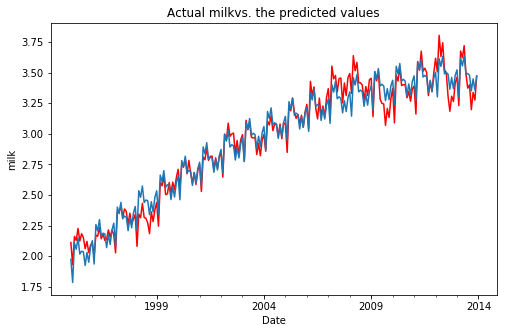

In [177]:
#plotting the fitted model
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(dairy_data, 'milk')   

In [180]:
#mean square error
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = dairy_data.loc['2013-01-31':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
RMSE(dairy_data.loc['2013-01-31':, 'milk'].as_matrix(), mod_fit.predict(X))

C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


0.2825648721853394

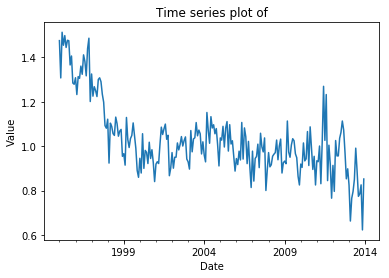

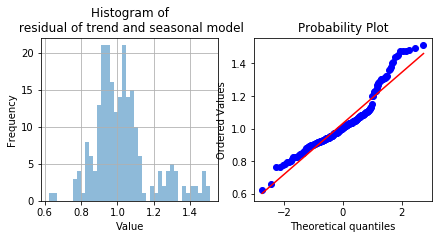

In [190]:
#time series plot of milk production
plot_ts(dairy_data.loc[:'2013-1-31', 'resids'],)
dist_ts(dairy_data.loc[:'2013-1-31', 'resids'], '\n residual of trend and seasonal model')

In [192]:
#applying stat models

from statsmodels.tsa.stattools import adfuller
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(decomp.resid[6:-6])    

DF_Test(dairy_data.loc[:'2013-1-31', 'resids'])

D-F statistic = -7.067343223929941
p-value = 5.040568192593394e-10
number of lags used = 13
Critical value at 5% confidence = -2.8759570379821047
Critical value at 10% confidence = -2.574454682874228
D-F statistic = -3.6333226199765822
p-value = 0.005155011795385522
number of lags used = 14
Critical value at 5% confidence = -2.8759570379821047
Critical value at 10% confidence = -2.574454682874228


In [ ]:
#RMSE score is 0.28 and the model fits pretty well. COnfidence interval remains small compared to the forecasted mean.
# as time moves in the future the confidence interval remains un changed 